In [1]:
import pandas as pd
import numpy as np
import sklearn 
import re
import string

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
t_data = pd.read_csv (r'/content/drive/MyDrive/original/ISOT/True.csv')

In [ ]:
f_data = pd.read_csv (r'/content/drive/MyDrive/original/ISOT/Fake.csv')

In [ ]:
t_data['Label'] = 0
f_data['Label'] = 1

In [ ]:
t_data

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [ ]:
f_data

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [ ]:
data = t_data.append(f_data).sample(frac=1).reset_index().drop(columns=['index'])

<ipython-input-9-a04f91b45026>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = t_data.append(f_data).sample(frac=1).reset_index().drop(columns=['index'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
data = data.rename({'text': 'statement', 'Label': 'label'}, axis=1)

In [ ]:
del data["title"]
del data['date']
del data['subject']

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  44898 non-null  object
 1   label      44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [ ]:
!pip install nltk
!pip install regex
!pip install contractions
import re
import contractions
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('words') #download list of english words
nltk.download('stopwords') #download list of stopwords
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
stopWords = stopwords.words('english')
englishWords = set(nltk.corpus.words.words())


def remove_contractions(text): 
    return ' '.join([contractions.fix(word) for word in text.split()])

tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

def nltkToWordnet(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:                    
        return None

def lemmatize(tokens):
    pos_tags = nltk.pos_tag(tokens)    
    res_words = []
    for word, tag in pos_tags:
        tag = nltkToWordnet(tag)    
        if tag is None:                        
            res_words.append(word)
        else:
            res_words.append(lemmatizer.lemmatize(word, tag))
    return res_words

def remove_stopWords(tokens):
    return [w for w in tokens if (w in englishWords and w not in stopWords)]

    # Split up contractions
    text = ' '.join([contractions.fix(word) for word in text.split()])
    # Tokenize text
    tokens = tokenizer.tokenize(text)
    # Lemmatize tokens
    tokens = lemmatize(tokens)
    # Remove stopwords
    tokens = remove_stopWords(tokens)
    # Print results
    data.at[i, "statement"] = " ".join(tokens)

def split_and_filter_words(string):
  words = string.split()
  if len(words) > 20:
    return " ".join(words)
  return None

def clean_text(text):
    text = ' '.join([contractions.fix(word) for word in text.split()])
    # Tokenize text
    tokens = tokenizer.tokenize(text)
    # Lemmatize tokens
    tokens = lemmatize(tokens)
    # Remove stopwords
    tokens = remove_stopWords(tokens)
    # Print results
    text = " ".join(tokens)
    return text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 23.9 MB/s eta 0:00:00


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
data['statement'] = data['statement'].astype(str)
#lowercase
data['statement'] = data['statement'].apply(lambda x: x.lower())
#url removal
data['statement'] = data['statement'].apply(lambda x: re.sub(r"http\S+", "", x))
# remove special characters, numbers, and punctuation
data['statement'] = data['statement'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
#apply clean_text
data['statement'] = data['statement'].apply(clean_text)
data['statement'] = data['statement'].app 

In [ ]:
print(data['statement'])

0        rogue government twitter account consider help...
1        accord sun w bush successor promise close camp...
2        regime allow wrest control election state good...
3        berlin earn reputation chief crisis manager mu...
4        chair sit chuck meet press two discuss trump r...
                               ...                        
44893    us defense secretary meet civilian military le...
44894    brazil top prosecutor charge former president ...
44895    russia president say think north crisis would ...
44896    president warn constitutional court judge stop...
44897    us department homeland security say statement ...
Name: statement, Length: 44898, dtype: object


In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42768 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  42768 non-null  object
 1   label      42768 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1002.4+ KB


In [ ]:
data.head()

,statement,label
0,rogue government twitter account consider help...,1
1,accord sun w bush successor promise close camp...,1
2,regime allow wrest control election state good...,1
3,berlin earn reputation chief crisis manager mu...,0
4,chair sit chuck meet press two discuss trump r...,1


In [ ]:
# saving the dataframe
data.to_csv(r'/content/drive/MyDrive/New/Clean/isot_clean.csv')

In [3]:
data = pd.read_csv(r'/content/drive/MyDrive/New/Clean/isot_clean.csv')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_v.fit_transform(data['statement']).toarray()
y = data['label']

import joblib
# Save the TfidfVectorizer
joblib.dump(tfidf_v, '/content/drive/MyDrive/Colab Notebooks/weights/ISOT/learners/tfidf_isot.pkl')

['/content/drive/MyDrive/Colab Notebooks/weights/ISOT/learners/tfidf_isot.pkl']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4287
           1       0.98      0.97      0.97      4267

    accuracy                           0.97      8554
   macro avg       0.97      0.97      0.97      8554
weighted avg       0.97      0.97      0.97      8554



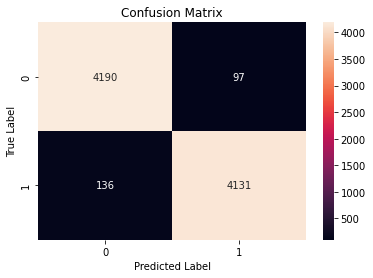

In [ ]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Model accuracy score with default hyperparameters: 0.9821
Precision: 0.984 / Recall: 0.98 / F1-Score: 0.982 / Accuracy: 0.982


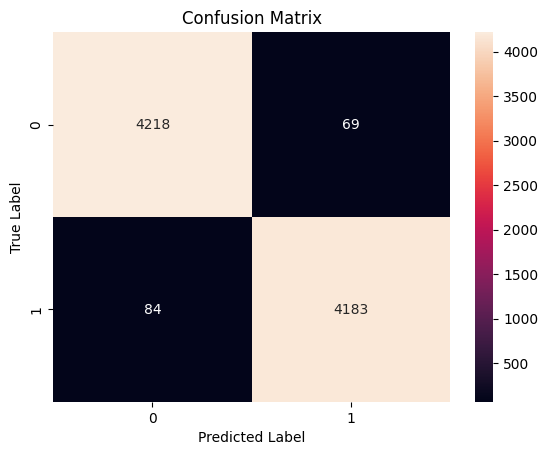

['/content/drive/MyDrive/Colab Notebooks/weights/ISOT/svm_isot.pkl']

In [ ]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

joblib.dump(svc, '/content/drive/MyDrive/Colab Notebooks/weights/ISOT/svm_isot.pkl')

Iteration 1, loss = 0.15761060
Iteration 2, loss = 0.04195391
Iteration 3, loss = 0.02219631
Iteration 4, loss = 0.01151680
Iteration 5, loss = 0.00626605
Iteration 6, loss = 0.00454799
Iteration 7, loss = 0.00326070
Iteration 8, loss = 0.00223032
Iteration 9, loss = 0.00173486
Iteration 10, loss = 0.00172107
Iteration 11, loss = 0.00107278
Iteration 12, loss = 0.00121586
Iteration 13, loss = 0.00107932
Iteration 14, loss = 0.00097230
Iteration 15, loss = 0.00110347
Iteration 16, loss = 0.00087077
Iteration 17, loss = 0.00083753
Iteration 18, loss = 0.00080714
Iteration 19, loss = 0.00077728
Iteration 20, loss = 0.00074774
Iteration 21, loss = 0.00071863
Iteration 22, loss = 0.00069062
Iteration 23, loss = 0.00066353
Iteration 24, loss = 0.00063525
Iteration 25, loss = 0.00060774
Iteration 26, loss = 0.00058114
Iteration 27, loss = 0.00055504
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 0.9787234042553191
Precision: 0.975 / Recall:

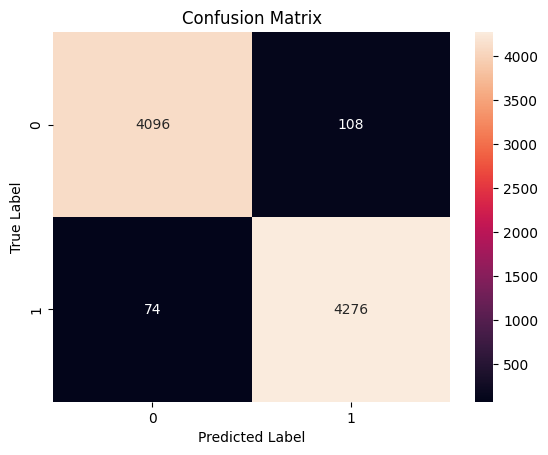

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),random_state=5,verbose=True,learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

# Make prediction on test dataset
y_pred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Precision: 0.926 / Recall: 0.866 / F1-Score: 0.895 / Accuracy: 0.897
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4204
           1       0.93      0.87      0.90      4350

    accuracy                           0.90      8554
   macro avg       0.90      0.90      0.90      8554
weighted avg       0.90      0.90      0.90      8554



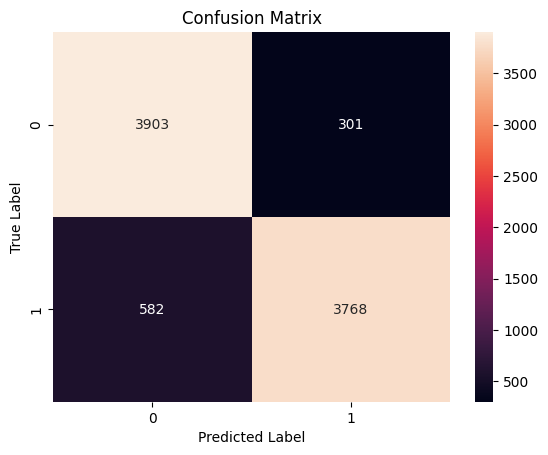

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=1)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
y_pred = knn.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))
    
# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Precision: 0.978 / Recall: 0.977 / F1-Score: 0.977 / Accuracy: 0.977
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4287
           1       0.98      0.98      0.98      4267

    accuracy                           0.98      8554
   macro avg       0.98      0.98      0.98      8554
weighted avg       0.98      0.98      0.98      8554



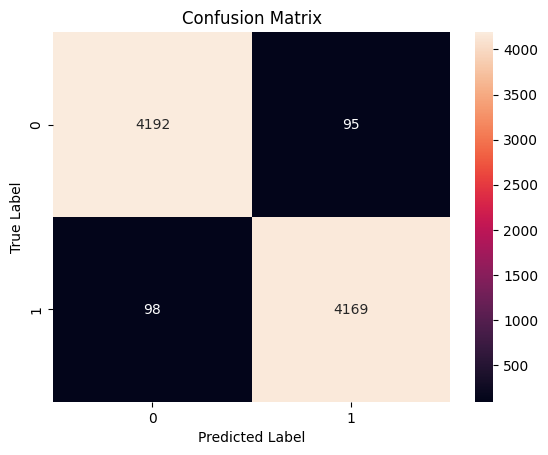

['/content/drive/MyDrive/Colab Notebooks/weights/ISOT/rf_isot.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
joblib.dump(rf_model, '/content/drive/MyDrive/Colab Notebooks/weights/ISOT/rf_isot.pkl')

Precision: 0.981 / Recall: 0.982 / F1-Score: 0.982 / Accuracy: 0.982


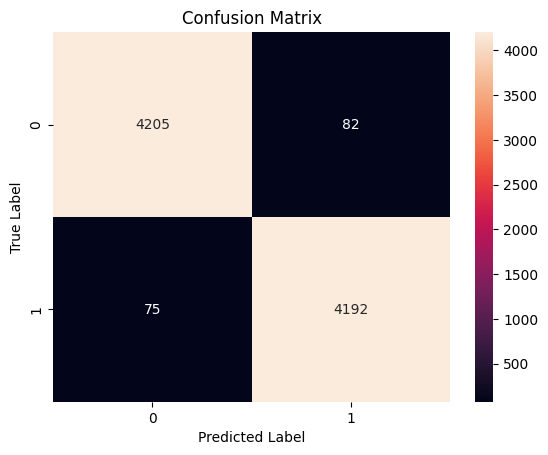

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifiers
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)


# Combine the classifiers using a voting ensemble
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('lr', lr_clf), ('knn', knn_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

# Make predictions using the voting classifier
voting_preds = voting_clf.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [8]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

predictions = [round(value) for value in y_pred]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 95.48%
Accuracy: 0.9547580079494973
Precision: 0.9625655698617072
Recall: 0.9460979610967893
F1-Score: 0.9542607256825435


In [9]:
mse = mean_squared_error(y_test,y_pred)
print("MSE : % f" %(mse))

MSE :  0.047166


In [10]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE : % f" %(rmse))

RMSE :  0.217178


In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
predictions = [round(value) for value in y_pred]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9547580079494973
Accuracy: 0.9547580079494973
Precision: 0.9566854990583804
Recall: 0.9524255917506445
F1-Score: 0.9545507927187316


Accuracy: 0.9265840542436287
Precision: 0.915 / Recall: 0.943 / F1-Score: 0.929 / Accuracy: 0.927
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      4204
           1       0.91      0.94      0.93      4350

    accuracy                           0.93      8554
   macro avg       0.93      0.93      0.93      8554
weighted avg       0.93      0.93      0.93      8554



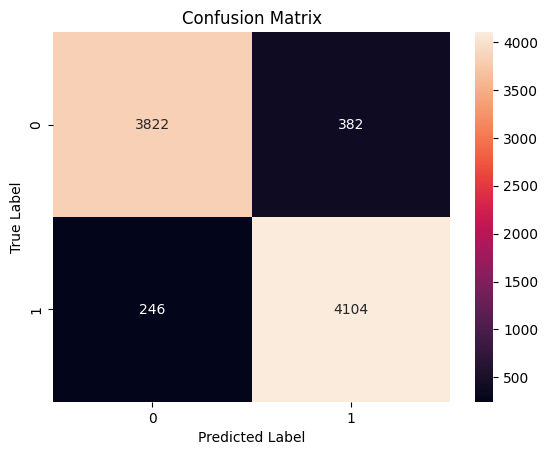

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=acae6ee9-335d-4e3f-adb7-fdcb7783098d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>